<a href="https://colab.research.google.com/github/akhils-codes1/ML4Crypto-2022/blob/main/rechecked_r1_vs_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai
!pip install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 1.9 MB/s eta 0:00:00


In [2]:
from fastai.vision.all import *
import timm

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [5]:
!ls /content/gdrive/MyDrive/rechecked_results/1

allrounds_png.zip  r1random_png.zip  recheched_r1_vs_random.ipynb


In [6]:
%cd /content/gdrive/MyDrive/rechecked_results/1

/content/gdrive/MyDrive/rechecked_results/1


In [7]:
!ls

allrounds_png.zip  r1random_png.zip  recheched_r1_vs_random.ipynb


In [8]:
!unzip '/content/gdrive/MyDrive/rechecked_results/1/r1random_png.zip' -d '/content/gdrive/MyDrive/rechecked_results/1'

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/rechecked_results/1/r1random_png/1_1.png  
  inflating: /content/gdrive/MyDrive/rechecked_results/1/r1random_png/0_17.png  
  inflating: /content/gdrive/MyDrive/rechecked_results/1/r1random_png/0_26.png  
  inflating: /content/gdrive/MyDrive/rechecked_results/1/r1random_png/1_47.png  
  inflating: /content/gdrive/MyDrive/rechecked_results/1/r1random_png/1_67.png  
  inflating: /content/gdrive/MyDrive/rechecked_results/1/r1random_png/0_70.png  
  inflating: /content/gdrive/MyDrive/rechecked_results/1/r1random_png/1_86.png  
  inflating: /content/gdrive/MyDrive/rechecked_results/1/r1random_png/0_90.png  
  inflating: /content/gdrive/MyDrive/rechecked_results/1/r1random_png/1_98.png  
  inflating: /content/gdrive/MyDrive/rechecked_results/1/r1random_png/0_101.png  
  inflating: /content/gdrive/MyDrive/rechecked_results/1/r1random_png/1_104.png  
  inflating: /content/gdrive/MyDrive/rechecked_results/1/

In [9]:
path = Path('/content/gdrive/MyDrive/rechecked_results/1/r1random_png/')

In [10]:
files = get_image_files(path)
files[0]

Path('/content/gdrive/MyDrive/rechecked_results/1/r1random_png/0_1.png')

In [11]:
len(files)

12000

In [12]:
pat = r'^(.*)_\d+.png'

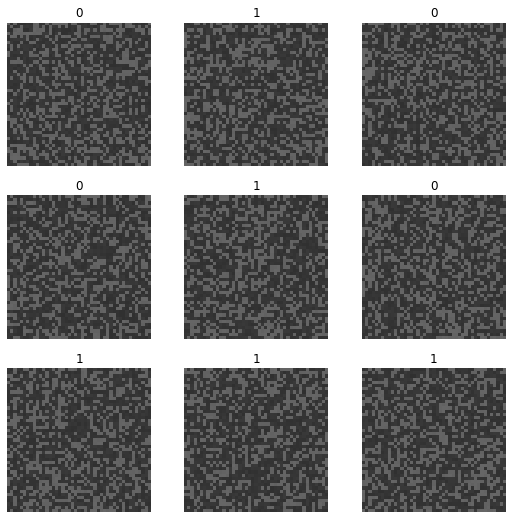

In [14]:
dls1 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls1.show_batch()

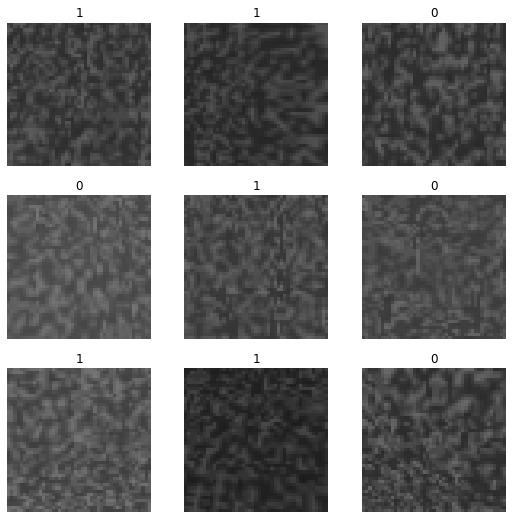

In [15]:
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()

#ConvNext

epoch,train_loss,valid_loss,accuracy,time
0,0.896392,0.831084,0.503750,00:32


epoch,train_loss,valid_loss,accuracy,time
0,0.739226,0.721830,0.498750,00:34
1,0.732014,0.736662,0.493333,00:33
2,0.736242,0.804173,0.498750,00:34
3,0.733644,0.696987,0.490833,00:33
4,0.723962,0.766307,0.507917,00:33
5,0.717425,0.979950,0.499583,00:33
6,0.700724,0.714862,0.493750,00:34
7,0.688800,0.713972,0.510000,00:42
8,0.661308,0.735226,0.505833,00:42
9,0.650196,0.730447,0.512917,00:34


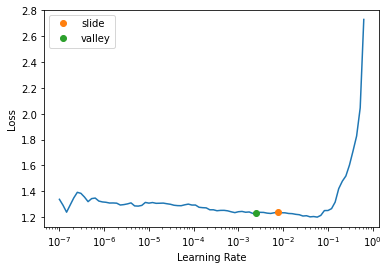

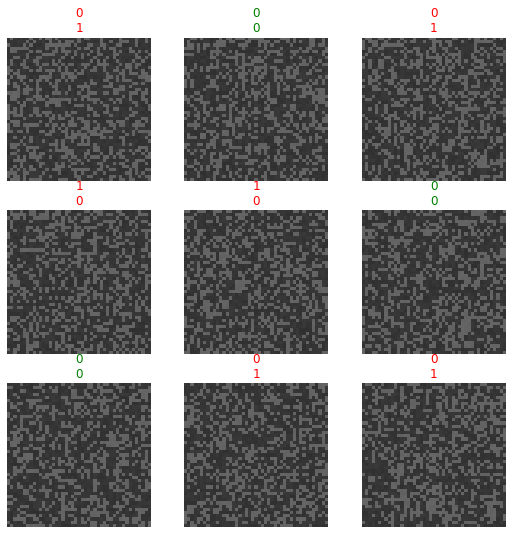

In [16]:
# import timm
architecture = 'convnext_nano'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,1.136534,0.950444,0.497083,00:31


epoch,train_loss,valid_loss,accuracy,time
0,0.951655,0.718496,0.512083,00:34
1,0.921928,0.763221,0.497917,00:34
2,0.865236,0.754873,0.501667,00:40
3,0.798970,0.695146,0.504167,00:34
4,0.775154,0.702813,0.497500,00:33
5,0.746112,0.694186,0.502083,00:33
6,0.746121,0.694856,0.495000,00:33
7,0.741730,0.693643,0.507500,00:33
8,0.732096,0.694081,0.497083,00:33
9,0.735016,0.694216,0.496667,00:35


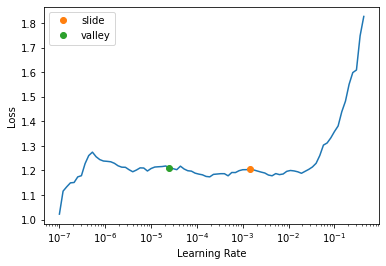

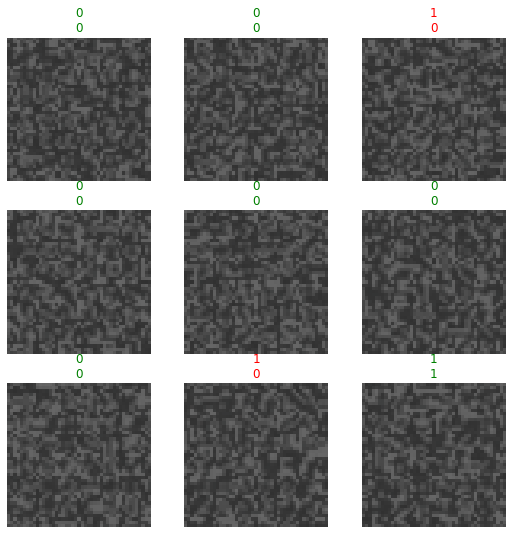

In [17]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

In [18]:
def runit(dls,architecture,epochs):
  learn = vision_learner(dls, architecture , metrics=accuracy)
  x = learn.lr_find(suggest_funcs=(slide, valley))
  lr = (x[0]+x[1])/2.0
  learn.fine_tune(epochs,lr)
  learn.show_results()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet34-43635321.pth" to /root/.cache/torch/hub/checkpoints/resnet34-43635321.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.006807,0.768791,0.512083,00:32


epoch,train_loss,valid_loss,accuracy,time
0,0.757933,0.719655,0.525000,00:33
1,0.723673,0.727479,0.503750,00:33
2,0.709960,0.732502,0.494583,00:33
3,0.686162,0.731537,0.495417,00:33
4,0.653885,0.759079,0.495833,00:33
5,0.589964,0.818314,0.480417,00:33
6,0.535803,0.880630,0.476667,00:33
7,0.467733,0.951878,0.491250,00:33
8,0.433892,0.990881,0.493750,00:33
9,0.416386,0.992834,0.487917,00:34


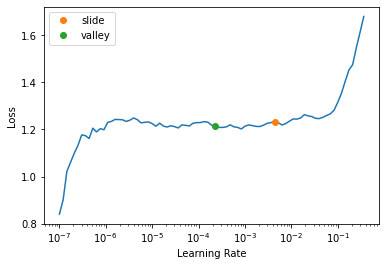

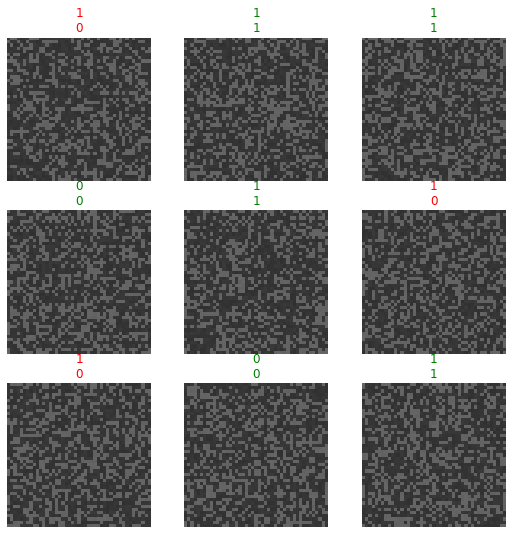

In [19]:
runit(dls1, 'resnet34',10)

epoch,train_loss,valid_loss,accuracy,time
0,1.105468,0.859135,0.491250,00:32


epoch,train_loss,valid_loss,accuracy,time
0,0.921199,0.761915,0.507500,00:37
1,0.836540,0.733989,0.510833,00:37
2,0.771131,0.715671,0.499583,00:36
3,0.723928,0.703203,0.510417,00:35
4,0.712211,0.700481,0.502083,00:36
5,0.706203,0.699170,0.494583,00:36
6,0.700792,0.697008,0.497917,00:36
7,0.699523,0.697412,0.488750,00:34
8,0.699169,0.696885,0.483333,00:34
9,0.698630,0.696269,0.489167,00:33


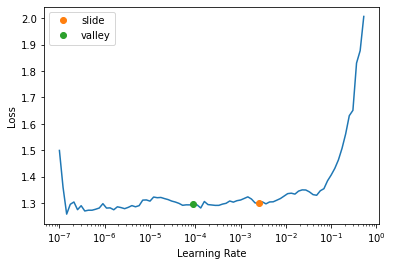

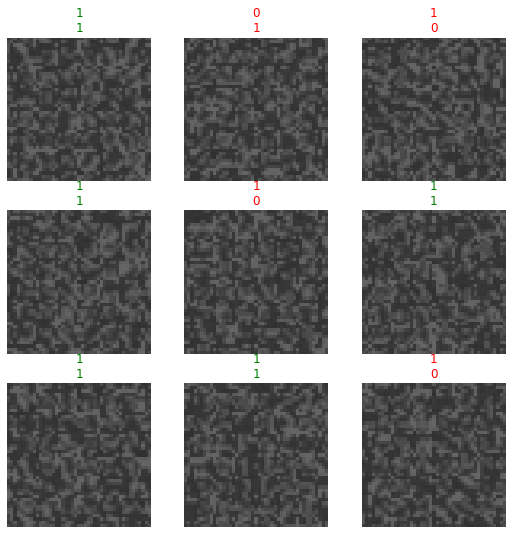

In [21]:
runit(dls2, 'resnet34',10)

#DarkNet

epoch,train_loss,valid_loss,accuracy,time
0,1.117442,0.844034,0.507917,00:33


epoch,train_loss,valid_loss,accuracy,time
0,0.820306,0.772875,0.501667,00:34
1,0.770578,0.729212,0.494583,00:34
2,0.728306,0.728277,0.498333,00:35
3,0.712328,0.713124,0.501667,00:35
4,0.700470,0.733340,0.513750,00:34
5,0.681474,0.738686,0.494583,00:35
6,0.656873,0.750335,0.497500,00:34
7,0.618290,0.772400,0.493333,00:35
8,0.607190,0.780135,0.494167,00:34
9,0.596480,0.776408,0.493333,00:34


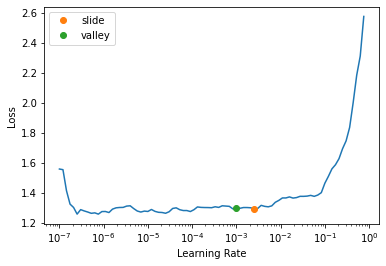

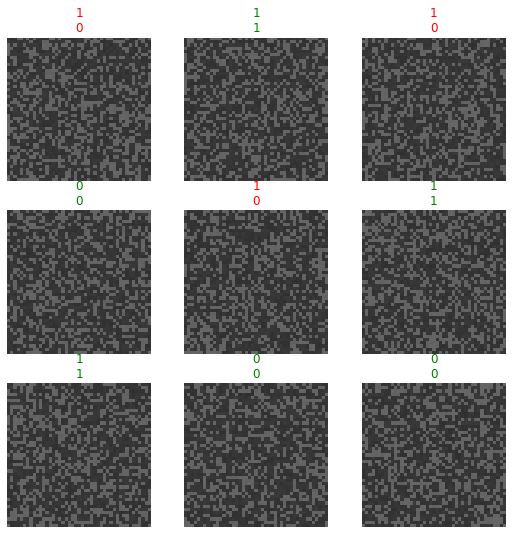

In [22]:
runit(dls1, 'darknet53',10)

epoch,train_loss,valid_loss,accuracy,time
0,1.095734,0.898928,0.497083,00:33


epoch,train_loss,valid_loss,accuracy,time
0,0.868306,0.815171,0.487083,00:34
1,0.798425,0.736477,0.505417,00:34
2,0.749504,0.779267,0.516250,00:34
3,0.729765,0.726957,0.502500,00:35
4,0.740337,0.788945,0.500000,00:34
5,0.729536,0.807064,0.499167,00:34
6,0.718196,0.694113,0.511667,00:34
7,0.712452,0.696045,0.503333,00:34
8,0.708915,0.700317,0.495417,00:34
9,0.704764,0.695003,0.495000,00:34


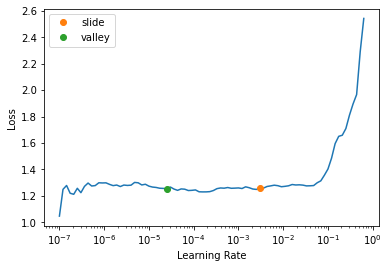

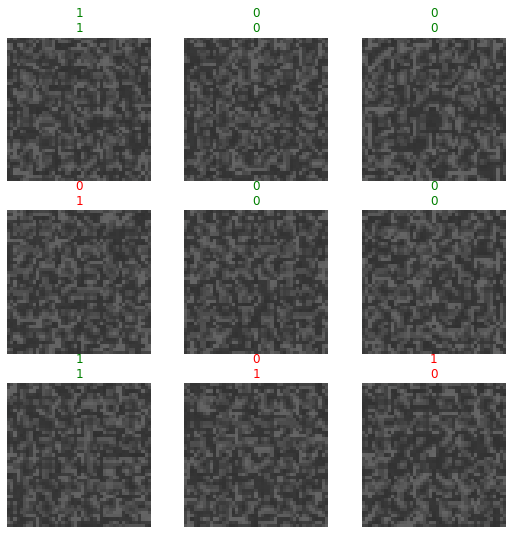

In [23]:
runit(dls2, 'darknet53',10)

#densenet121

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.202614,0.985054,0.497500,00:39


epoch,train_loss,valid_loss,accuracy,time
0,0.879317,0.813745,0.493750,00:43
1,0.794177,0.755940,0.495417,00:43
2,0.731836,0.724811,0.503750,00:43
3,0.703536,0.717365,0.509167,00:42
4,0.694601,0.713457,0.493333,00:42
5,0.686692,0.719938,0.499583,00:42
6,0.671683,0.722856,0.500833,00:42
7,0.662617,0.723477,0.496667,00:42
8,0.648202,0.724949,0.502083,00:43
9,0.645386,0.734972,0.489167,00:42


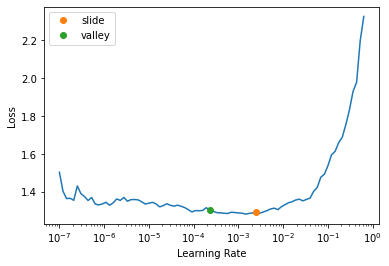

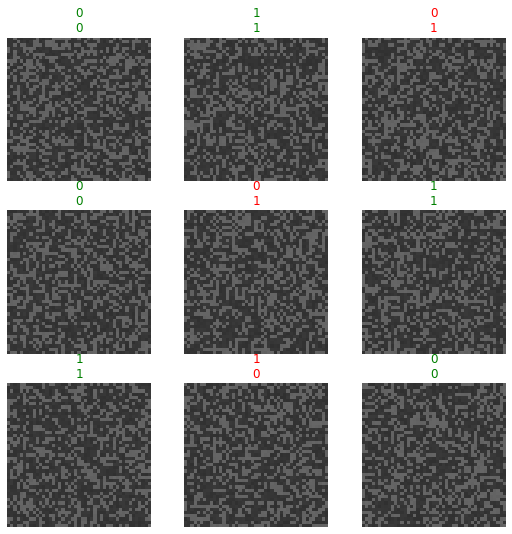

In [24]:
runit(dls1, 'densenet121',10)

epoch,train_loss,valid_loss,accuracy,time
0,1.076465,3.580359,0.501667,00:39


epoch,train_loss,valid_loss,accuracy,time
0,0.819911,1.543538,0.499167,00:43
1,0.753857,1.306297,0.501667,00:43
2,0.721558,0.714278,0.503750,00:43
3,0.713104,0.741891,0.503750,00:43
4,0.713903,0.814125,0.502083,00:43
5,0.707059,0.857242,0.498333,00:43
6,0.702484,0.701710,0.492500,00:43
7,0.698867,0.703831,0.502083,00:43
8,0.696578,0.714299,0.500417,00:43
9,0.699719,0.699168,0.501667,00:43


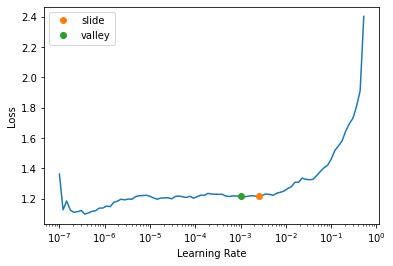

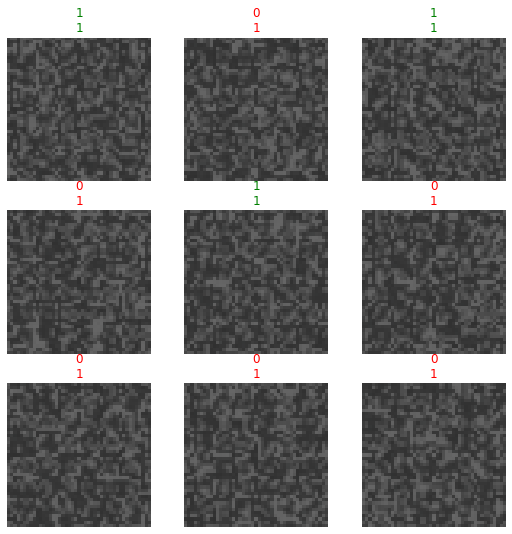

In [25]:
runit(dls2, 'densenet121',10)

#pnasnet5large

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/pnasnet5large-bf079911.pth" to /root/.cache/torch/hub/checkpoints/pnasnet5large-bf079911.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.003343,1.151833,0.496250,00:48


epoch,train_loss,valid_loss,accuracy,time
0,0.818525,0.810601,0.493750,01:05
1,0.791815,0.800886,0.499583,01:05
2,0.819436,0.877799,0.501667,01:05
3,0.818384,1.046771,0.502500,01:05
4,0.815186,0.826685,0.500000,01:05
5,0.784457,0.845558,0.501667,01:05
6,0.764277,0.777689,0.497917,01:05
7,0.735277,0.790502,0.493333,01:05
8,0.732162,0.787288,0.497083,01:05
9,0.718186,0.778411,0.493333,01:05


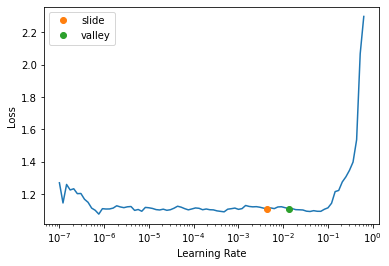

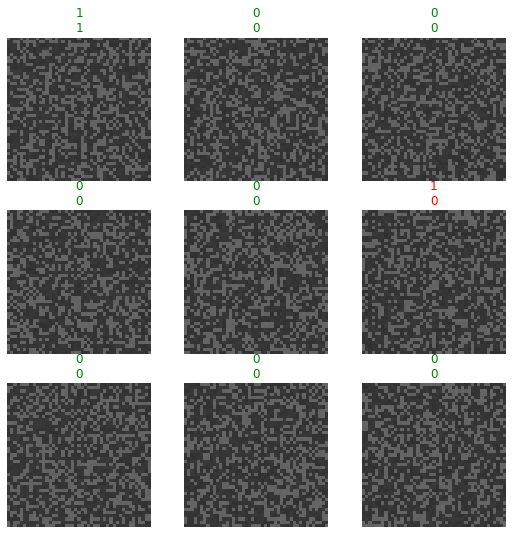

In [26]:
runit(dls1, 'pnasnet5large',10)

epoch,train_loss,valid_loss,accuracy,time
0,0.936990,0.999343,0.518750,00:48


epoch,train_loss,valid_loss,accuracy,time
0,0.809150,0.953745,0.507083,01:08
1,0.796548,0.877669,0.507083,01:08
2,0.789260,0.888226,0.518333,01:08
3,0.749676,0.924547,0.488750,01:07
4,0.732929,0.783557,0.483333,01:08
5,0.725118,0.789921,0.502917,01:08
6,0.714296,0.752786,0.505417,01:07
7,0.709041,0.752596,0.503750,01:08
8,0.708850,0.705837,0.495000,01:07
9,0.702220,0.698072,0.500833,01:08


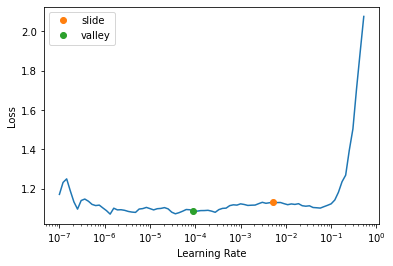

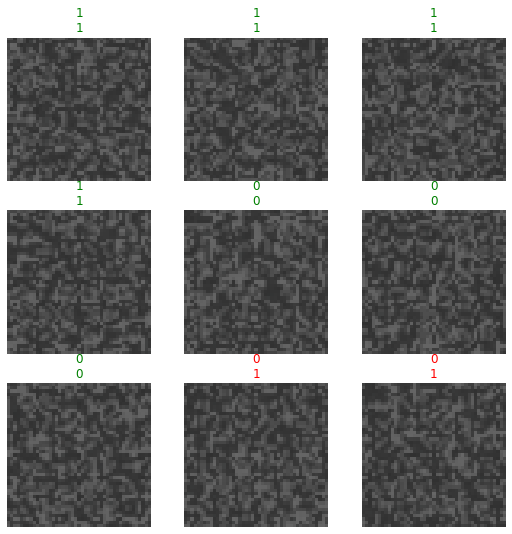

In [27]:
runit(dls2, 'pnasnet5large',10)

#ResNext101_64x4d

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-tpu-weights/resnext101_64x4d_c-0d0e0cc0.pth" to /root/.cache/torch/hub/checkpoints/resnext101_64x4d_c-0d0e0cc0.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.925611,0.809916,0.498333,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.725212,0.725564,0.517083,00:45
1,0.730658,0.736410,0.504583,00:45
2,0.739697,0.734382,0.487500,00:45
3,0.738749,0.709339,0.489167,00:45
4,0.735961,0.727760,0.509583,00:46
5,0.717738,0.725260,0.492083,00:45
6,0.696385,0.721288,0.500417,00:45
7,0.666283,0.734389,0.501250,00:45
8,0.639066,0.756043,0.493750,00:45
9,0.625207,0.752238,0.500833,00:45


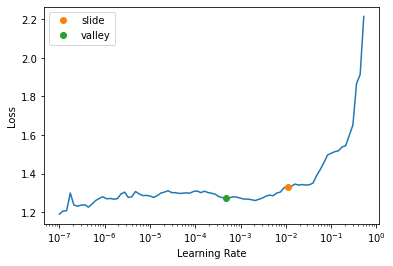

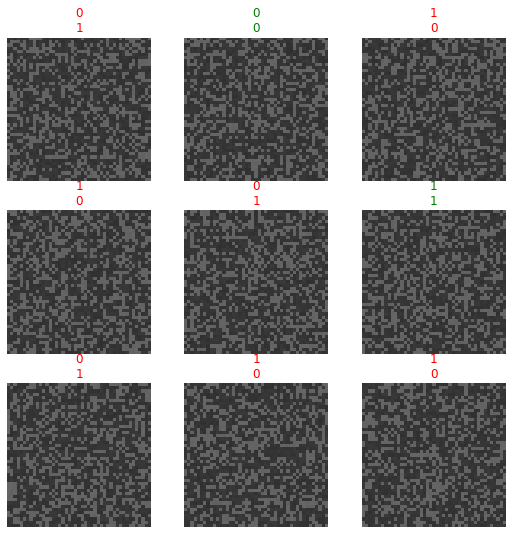

In [28]:
runit(dls1, 'resnext101_64x4d',10)

epoch,train_loss,valid_loss,accuracy,time
0,0.940423,0.816781,0.510833,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.725862,0.704822,0.506250,00:46
1,0.732915,0.725171,0.511667,00:46
2,0.746998,0.770734,0.512500,00:46
3,0.745884,0.784498,0.501667,00:46
4,0.750282,0.695736,0.514583,00:46
5,0.730264,0.705319,0.502917,00:46
6,0.716206,0.695953,0.496667,00:46
7,0.709321,0.698617,0.506250,00:46
8,0.708021,0.693093,0.510000,00:46
9,0.701461,0.694438,0.488750,00:46


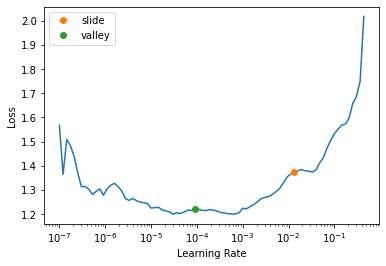

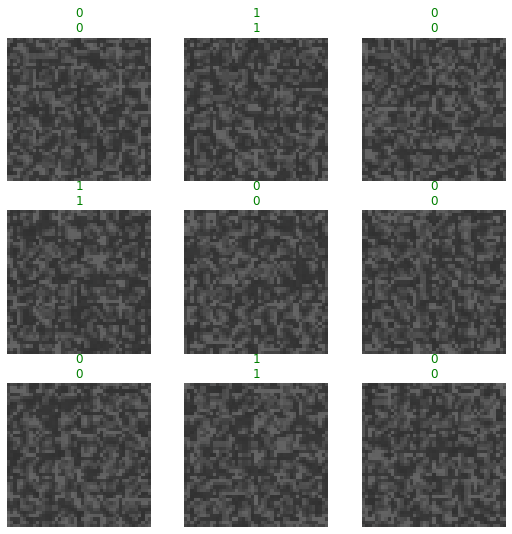

In [29]:
runit(dls2, 'resnext101_64x4d',10)

#ResNet152

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet152_a1h-dc400468.pth" to /root/.cache/torch/hub/checkpoints/resnet152_a1h-dc400468.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.979429,0.925689,0.506667,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.731683,0.782831,0.516250,00:45
1,0.728791,0.804624,0.485417,00:45
2,0.745830,0.755255,0.509583,00:46
3,0.742209,0.865954,0.499583,00:45
4,0.735840,0.814837,0.510833,00:46
5,0.723379,0.770012,0.493750,00:48
6,0.715118,0.715806,0.496250,00:47
7,0.704960,0.762254,0.506250,00:45
8,0.698413,0.766497,0.506667,00:45
9,0.695657,0.867353,0.491250,00:46


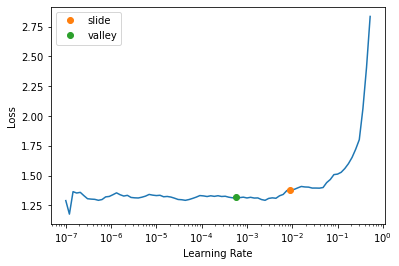

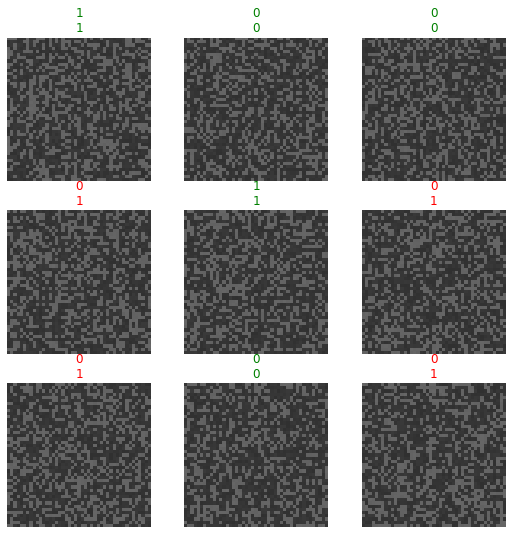

In [30]:
runit(dls1, 'resnet152',10)

epoch,train_loss,valid_loss,accuracy,time
0,1.037037,0.751879,0.498750,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.738599,0.698217,0.499167,00:45
1,0.717206,0.720282,0.498333,00:46
2,0.728163,0.733049,0.490000,00:46
3,0.725249,0.707897,0.503333,00:45
4,0.727392,0.729579,0.494167,00:45
5,0.713295,0.704054,0.502083,00:46
6,0.710508,0.695154,0.500000,00:46
7,0.703703,0.697870,0.495000,00:46
8,0.699494,0.693448,0.495833,00:46
9,0.696561,0.691997,0.512083,00:46


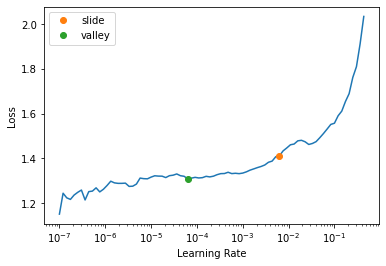

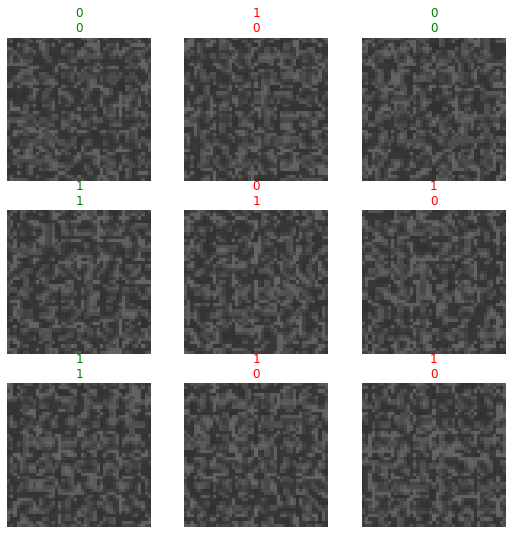

In [32]:
runit(dls2, 'resnet152',10)